Modifikasi Tugas Praktik AI Fundamental

Nadea Putri Nur Fauzi - Ular

Klasifikasi Mobil Menggunakan Decision Tree

Dataset : https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv

### Step 1 (Import Library)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Step 2 (Open Dataset)

In [39]:
url = 'https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv'
data = pd.read_csv(url, header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Step 3 (Explorartory Data Analysis)

In [40]:
#memberi nama kolom
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [41]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [42]:
data.shape

(1728, 7)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [44]:
#melihat isi dan jumlah bagian per kolom
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(data[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

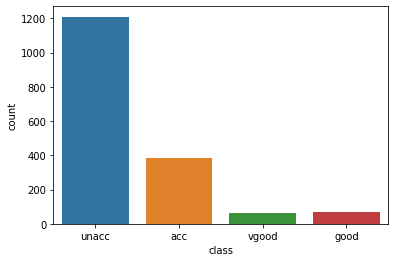

In [45]:
#melihat grafik kelas 
sns.countplot(data['class'])

In [46]:
#melihat data null
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Summary Data :

1. Jumlah data yaitu 1728 baris dengan 7 kolom (buying, maint, doors, persons, lug_boot, safety dan class).

2. Kelas data (kolom class) ada 4  yaitu unacc, acc, vgood dan good.

3. Tidak ada data null (kosong)

### Step 4 (Membagi Variabel Vector dan Target)

In [47]:
x = data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']] #vector
y = data['class'] #target

In [48]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [49]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

### Step 5 (Membagi Data Menjadi Training dan Testing)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [51]:
x_train.shape, x_test.shape

((1296, 6), (432, 6))

### Step 6 (Encoder Data)

In [53]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [54]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1036,1,1,1,1,1,1
757,2,2,2,2,1,1
589,2,1,3,3,2,1
907,1,3,3,1,3,1
1159,1,4,1,3,3,1


In [55]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,1,1,2,2,2
1201,1,2,2,1,2,1
628,2,1,4,2,3,1
1498,3,1,4,1,2,1
1263,1,2,1,3,2,3


### Step 7 (Pemodelan DTree Menggunakan Index Gini)

In [56]:
from sklearn.tree import DecisionTreeClassifier
for max_d in range(1,20):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(x_train, y_train)
  print('Hasil Training model untuk max_depth {} adalah :'.format(max_d), model.score(x_train,y_train))
  print('Hasil Testing model untuk max_depth {} adalah :'.format(max_d), model.score(x_test,y_test))
  print('')

Hasil Training model untuk max_depth 1 adalah : 0.7067901234567902
Hasil Testing model untuk max_depth 1 adalah : 0.6805555555555556

Hasil Training model untuk max_depth 2 adalah : 0.7445987654320988
Hasil Testing model untuk max_depth 2 adalah : 0.7476851851851852

Hasil Training model untuk max_depth 3 adalah : 0.7862654320987654
Hasil Testing model untuk max_depth 3 adalah : 0.8078703703703703

Hasil Training model untuk max_depth 4 adalah : 0.8109567901234568
Hasil Testing model untuk max_depth 4 adalah : 0.8287037037037037

Hasil Training model untuk max_depth 5 adalah : 0.8240740740740741
Hasil Testing model untuk max_depth 5 adalah : 0.8055555555555556

Hasil Training model untuk max_depth 6 adalah : 0.8595679012345679
Hasil Testing model untuk max_depth 6 adalah : 0.8402777777777778

Hasil Training model untuk max_depth 7 adalah : 0.8850308641975309
Hasil Testing model untuk max_depth 7 adalah : 0.8541666666666666

Hasil Training model untuk max_depth 8 adalah : 0.917438271604

In [57]:
from sklearn.tree import DecisionTreeClassifier

modelGini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
modelGini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [58]:
y_pred_gini = modelGini.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_gini)
print(cm)
accuracy_score(y_test, y_pred_gini)

[[ 82   4  14   3]
 [ 11   2   2   0]
 [ 18   0 276   0]
 [ 17   0   0   3]]


0.8402777777777778

In [60]:
y_pred_train_gini = modelGini.predict(x_train)

y_pred_train_gini

array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [61]:
cm = confusion_matrix(y_train, y_pred_train_gini)
print(cm)
accuracy_score(y_train, y_pred_train_gini)

[[241   4  35   1]
 [ 45   6   3   0]
 [ 58   0 858   0]
 [ 36   0   0   9]]


0.8595679012345679

In [62]:
#Hasil Akurasi Training dan Testing
print('Training set score: {:.4f}'.format(modelGini.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(modelGini.score(x_test, y_test)))

Training set score: 0.8596
Test set score: 0.8403


### Step 8 (Pemodelan DTree Menggunakan Nilai Entropi)

In [63]:
modelEn = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

modelEn.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [64]:
y_pred_en = modelEn.predict(x_test)

In [65]:
cm = confusion_matrix(y_test, y_pred_en)
print(cm)
accuracy_score(y_test, y_pred_en)

[[ 79   4  17   3]
 [ 12   2   1   0]
 [ 19   0 275   0]
 [ 17   0   0   3]]


0.8310185185185185

In [66]:
y_pred_train_en = modelEn.predict(x_train)

y_pred_train_en

array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [67]:
cm = confusion_matrix(y_train, y_pred_train_en)
print(cm)
accuracy_score(y_train, y_pred_train_en)

[[242   4  34   1]
 [ 47   6   1   0]
 [ 64   0 852   0]
 [ 36   0   0   9]]


0.8557098765432098

In [68]:
#Hasil Akurasi Training dan Testing
print('Training set score: {:.4f}'.format(modelEn.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(modelEn.score(x_test, y_test)))

Training set score: 0.8557
Test set score: 0.8310


### Step 9 (Classification Report Gini Model)

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.64      0.80      0.71       103
        good       0.33      0.13      0.19        15
       unacc       0.95      0.94      0.94       294
       vgood       0.50      0.15      0.23        20

    accuracy                           0.84       432
   macro avg       0.60      0.50      0.52       432
weighted avg       0.83      0.84      0.83       432



In [70]:
newdata = modelGini.predict(np.array([[1,2,3,2,3,1]]))
newdata

array(['unacc'], dtype=object)

In [71]:
newdata = modelGini.predict(np.array([[1,3,4,1,3,1]]))
newdata

array(['acc'], dtype=object)

Sumber:

https://www.section.io/engineering-education/hyperparmeter-tuning/#:~:text=Hyperparameter%20tuning%20in%20Decision%20Trees.%20This%20process%20of,argument%20represents%20the%20maximum%20depth%20of%20a%20tree.